# Шаталин Александр
## Рабочая тетрадь 8

### 1.1 Задание

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [88]:
features_df = iris_df.iloc[:, :-1].values
labels_df = iris_df.iloc[:, -1].values
print(features_df[:5, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [68]:
labels_num_df = []
for i in labels_df:
    if i == 'Setosa':
        labels_num_df.append(0)
    elif i == 'Versicolor': 
        labels_num_df.append(1)
    elif i == 'Virginica': 
        labels_num_df.append(2)

print(np.array(labels_num_df))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features_df)

print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


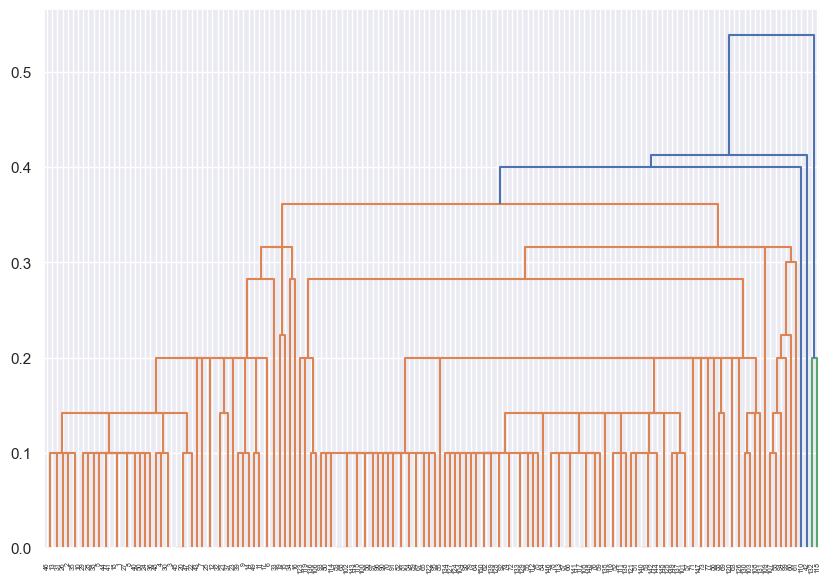

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(features_df[:, :2], 'single')
label_list = range (1, len(features_df)+1)
plt.figure(figsize = (10, 7))
dend = dendrogram(
    linked, 
    orientation = 'top', 
    labels = label_list, 
    distance_sort ='descending', 
    show_leaf_counts = True
    )
plt.show()

In [93]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(features_df[:, :2])

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

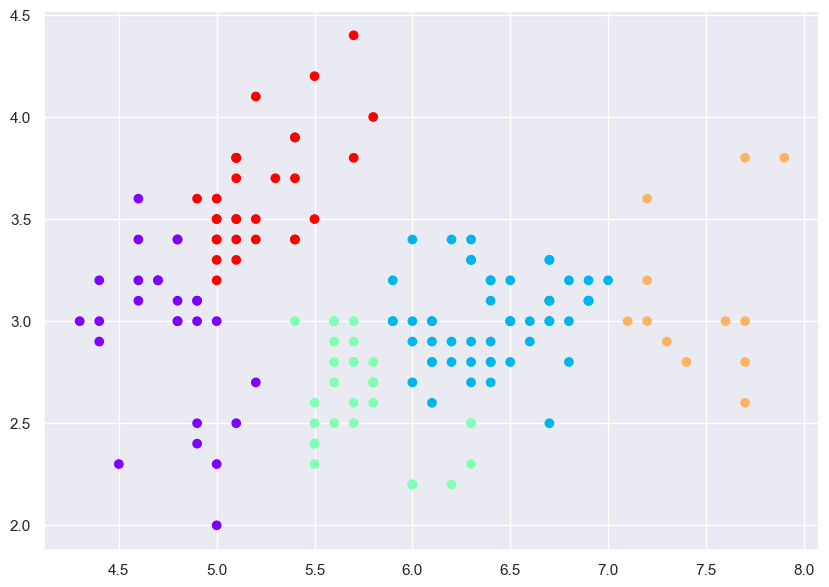

In [95]:
plt.figure(figsize=(10, 7))
plt.scatter(features_df[:, :1], features_df[:, 1:2], c=cluster. labels_, cmap='rainbow')